In [61]:
%matplotlib inline

import sys
import awkward_kaitai as ak
import matplotlib.pyplot as plt # plotting modules
import random
import numpy as np # numpy provides useful array manipulations like average, max, etc.
from pathlib import Path
import pprint

sys.path.append("..")

In [62]:
xia = ak.Reader("../src-pixie4e-awkward/libpixie4e.so")
pixie_data =  xia.load("../data/pixie4e/pixie4e.set")

In [63]:
# Show the fields for data events
print(pixie_data.fields)

['pixie4eA__Zfile_header', 'pixie4eA__Zevents', 'pixie4eA__Zfile_footer']


In [64]:
# Show the data structure of events
events = pixie_data['pixie4eA__Zevents']
events

<Array [{eventA__Zelements: [{...}, ...]}] type='1 * {eventA__Zelements: va...'>

In [65]:
energy = []
userPsaValue = []

for event in events['eventA__Zelements']:
    header = event['elementA__Zheader']
    energy.append(header['channel_headerA__Zenergy'])
    userPsaValue.append(header['channel_headerA__Zuser_psa_value'])

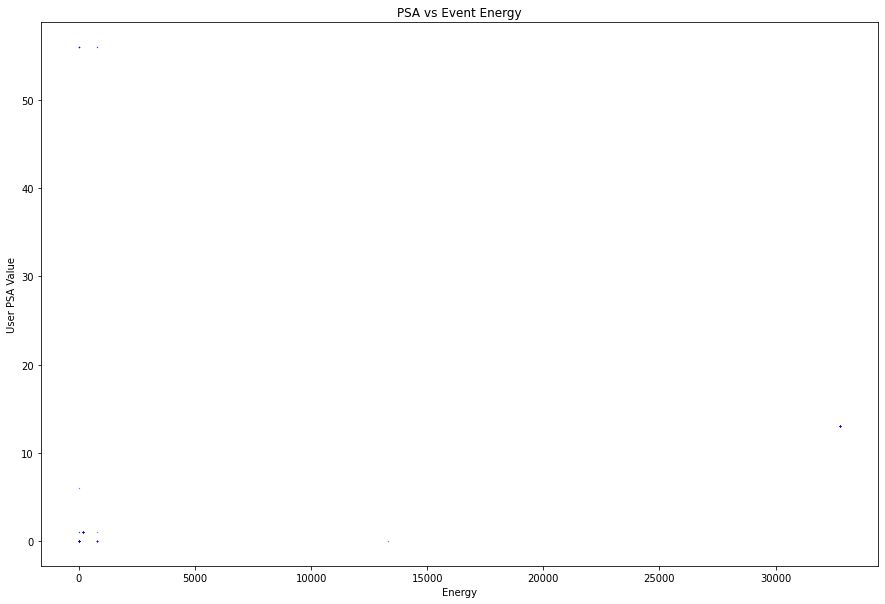

In [66]:
# Plot .set data
plt.figure(figsize=(15,10))
plt.scatter(energy, userPsaValue, marker='o', s=0.05, color='b')
plt.xlabel('Energy')
plt.ylabel('User PSA Value')
plt.title('PSA vs Event Energy')
plt.show()

In [ ]:
# Stack energy and userPsaValue for clustering
data = np.stack((energy, userPsaValue), axis=1)

# Use DBSCAN to identify clusters
db = DBSCAN(eps=40, min_samples=10).fit(data)
labels = db.labels_

# Get unique labels (clusters)
unique_labels = set(labels)

plt.figure(figsize=(15,10))

# Plotting the data points and calculating slopes
for label in unique_labels:
    if label == -1:
        # Noise points
        continue

    # Filter points by cluster label
    cluster_points = data[labels == label]
    energy_cluster = cluster_points[:, 0]
    userPsaValue_cluster = cluster_points[:, 1]

    # Fit a linear model to the cluster
    model = LinearRegression().fit(energy_cluster.reshape(-1, 1), userPsaValue_cluster)
    slope = model.coef_[0]
    intercept = model.intercept_

    # Generate line for the fitted model
    line_x = np.linspace(min(energy_cluster), max(energy_cluster), 100)
    line_y = slope * line_x + intercept

    # Plot cluster points
    plt.scatter(energy_cluster, userPsaValue_cluster, s=0.5)

    # Plot fitted line
    plt.plot(line_x, line_y)

plt.xlabel('Energy')
plt.ylabel('User PSA Value')
plt.title('PSA vs Event Energy with Linear Fits')
plt.legend()
plt.show()